In [22]:

from google.colab import files
uploaded = files.upload()

Saving 8. Student_Performance_Prediction.csv to 8. Student_Performance_Prediction (2).csv


Confusion Matrix:
 [[318   5]
 [ 17 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       323
           1       0.97      0.89      0.93       156

    accuracy                           0.95       479
   macro avg       0.96      0.94      0.95       479
weighted avg       0.95      0.95      0.95       479


Accuracy Score: 0.954070981210856


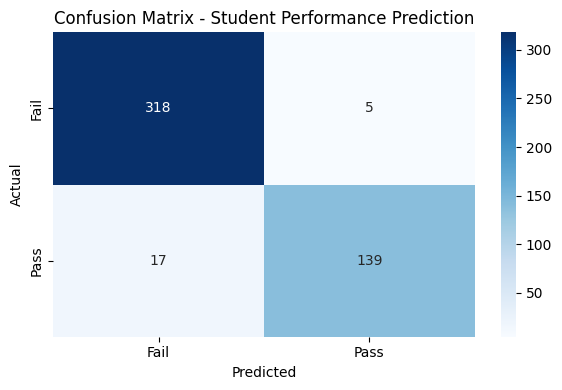

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("8. Student_Performance_Prediction.csv")

# Define the target: Pass (1) or Fail (0)
df['Pass'] = df['GradeClass'].apply(lambda x: 1 if x <= 2 else 0)

# Drop unnecessary columns
df = df.drop(['StudentID', 'GradeClass'], axis=1)

# Features and target
X = df.drop('Pass', axis=1)
y = df['Pass']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# 🎯 Plotting the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Student Performance Prediction')
plt.tight_layout()
plt.show()
